<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task5_EDA_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21**

**Preeti Tamrakar**

**To Do:** Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League'. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

**STEP 1: Understand the Problem Statement & Import Packages and Datasets.**

In [2]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading and importing the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


In this task, two datasets are given. First is matches.csv and the second is deliveries.csv. Lets deep dive into it.

In [57]:
matches = pd.read_csv("matches.csv",encoding='latin1')
deliveries = pd.read_csv("deliveries.csv",encoding='latin1')

In [58]:
#printing head( first five rows) of the matches dataset 
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [59]:
#Checking the shape of the matches dataset
matches.shape

(756, 18)

In [60]:
#printing head( first few rows) of the deliveries dataset
deliveries.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [61]:
#Checking the shape of the deliveries dataset
deliveries.shape

(179078, 21)

In [62]:
def display_unique(data):
    for column in data.columns :        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(matches)

No of Unique Values in id Column are : 756
Actual Unique Values in id Column are : [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   15

In [63]:
def display_unique(data):
    for column in data.columns :        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("")
display_unique(deliveries)

No of Unique Values in match_id Column are : 756
Actual Unique Values in match_id Column are : [    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   14

In [64]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [65]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [66]:
#We remove the umpire 3 as it has a large number of NULL values, whuich we won't require in EDA
matches = matches.drop(['umpire3'],axis=1)

In [67]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [68]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**DATA ANALYSIS**

Maximum matches winning team

In [69]:
most_winners = matches['winner'].value_counts()
most_winners.head(10).reset_index()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


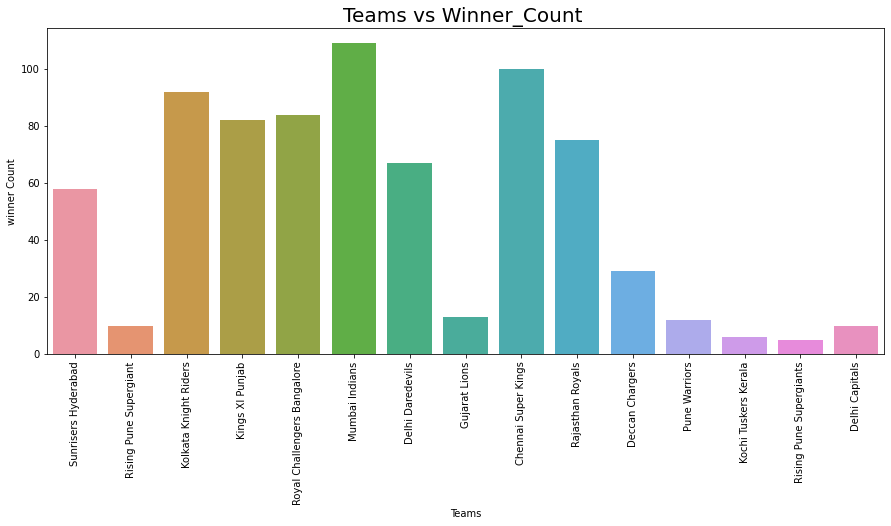

In [70]:
#Count Plot
plt.figure(figsize=(15,6))
sns.countplot('winner', data=matches)
plt.xlabel('Teams')
plt.ylabel('winner Count')
plt.title('Teams vs Winner_Count ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

Maximum Runs by Batsman 

In [71]:
batsman = deliveries.groupby(['batsman'])['batsman_runs'].agg(['sum']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
batting = batsman.head(10)
batting

,batsman,sum
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


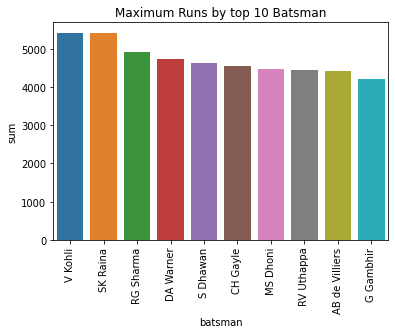

In [72]:
sns.barplot(x = 'batsman', y = 'sum', data = batting)
plt.title('Maximum Runs by top 10 Batsman') 
plt.xticks(rotation=90)
# Show the plot
plt.show()

The Player_of_Matche Trophy Maximum times winning player

In [73]:
matches['player_of_match'].value_counts().reset_index().head(10)

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


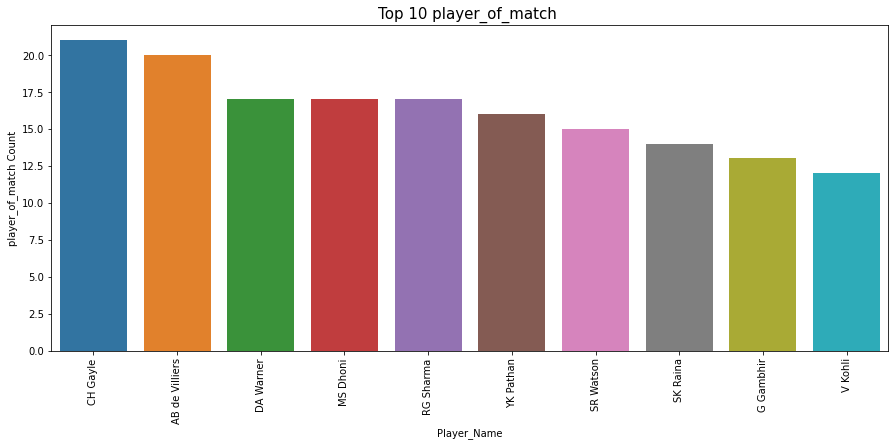

In [74]:
plt.figure(figsize=(15,6))
sns.barplot(matches['player_of_match'].value_counts()[:10].index, matches['player_of_match'].value_counts()[:10].values)
plt.xlabel('Player_Name')
plt.ylabel('player_of_match Count')
plt.title('Top 10 player_of_match ', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Maximum Toss winning team

In [75]:
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

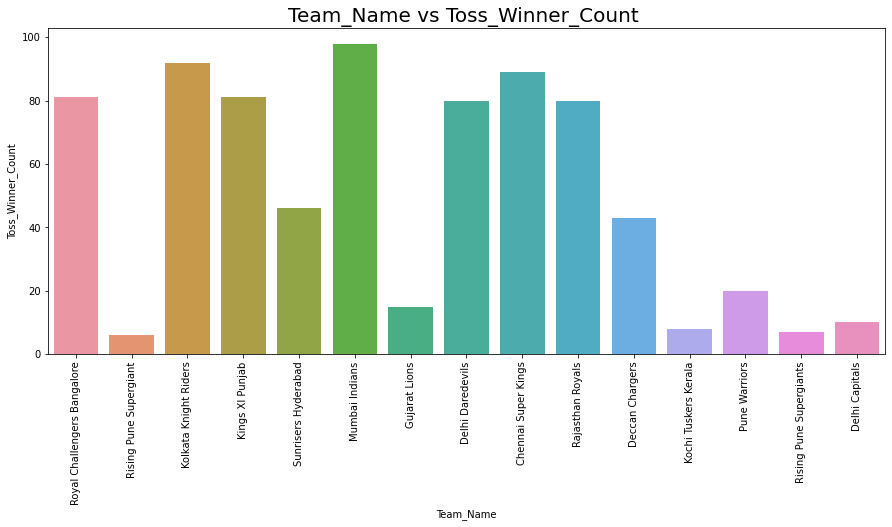

In [76]:
plt.figure(figsize=(15,6))
sns.countplot('toss_winner', data=matches)
plt.xlabel('Team_Name')
plt.ylabel('Toss_Winner_Count')
plt.title('Team_Name vs Toss_Winner_Count ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

Checking how many time, Toss decision made the team win

In [77]:
winner1 = matches.groupby(['toss_winner', 'toss_decision'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
winner1.head(10)

,toss_winner,toss_decision,count
0,Kolkata Knight Riders,field,62
1,Royal Challengers Bangalore,field,60
2,Kings XI Punjab,field,55
3,Mumbai Indians,field,54
4,Delhi Daredevils,field,51
5,Chennai Super Kings,bat,48
6,Rajasthan Royals,field,46
7,Mumbai Indians,bat,44
8,Chennai Super Kings,field,41
9,Rajasthan Royals,bat,32


Mathes palyed in the Year (Season)

In [78]:
matches['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

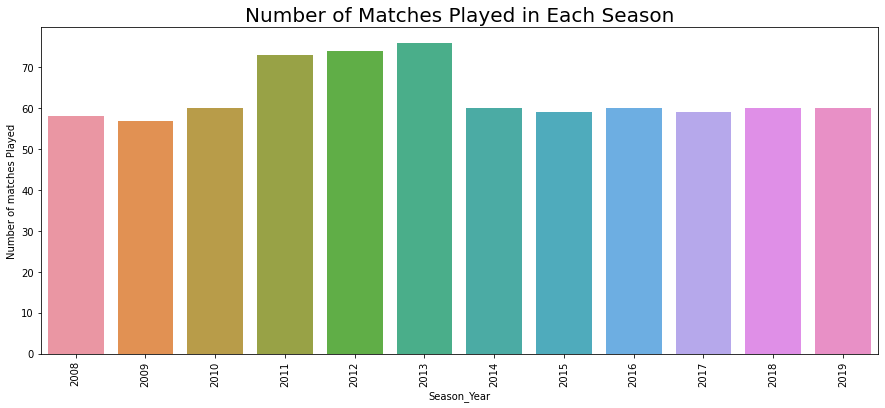

In [79]:
plt.figure(figsize=(15,6))
sns.countplot('season', data=matches)
plt.xlabel('Season_Year')
plt.ylabel('Number of matches Played')
plt.title('Number of Matches Played in Each Season', fontsize=20)
plt.xticks(rotation=90)
plt.show()

Venue and Winner

In [80]:
winner2 = matches.groupby(['venue','winner'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
winner2

,venue,winner,count
0,Eden Gardens,Kolkata Knight Riders,45
1,Wankhede Stadium,Mumbai Indians,42
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,34
3,M Chinnaswamy Stadium,Royal Challengers Bangalore,34
4,Sawai Mansingh Stadium,Rajasthan Royals,32
...,...,...,...
241,M. Chinnaswamy Stadium,Mumbai Indians,1
242,"MA Chidambaram Stadium, Chepauk",Pune Warriors,1
243,"MA Chidambaram Stadium, Chepauk",Rajasthan Royals,1
244,Maharashtra Cricket Association Stadium,Gujarat Lions,1


In [81]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Cape Town           7
Port Elizabeth      7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

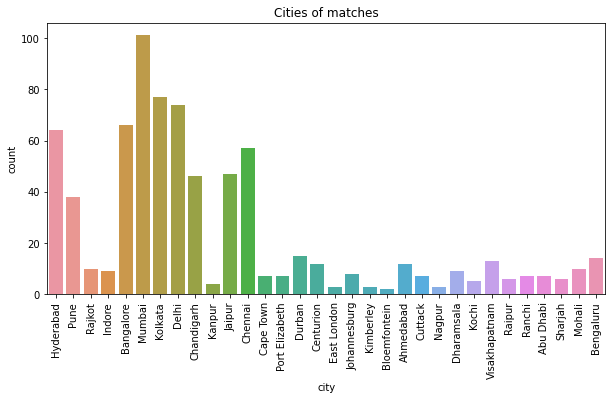

In [82]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'city', data = matches)
plt.title('Cities of matches')
plt.xticks(rotation = 90)

In [83]:
# Total matches where the tie led to a superover
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [84]:
# net runs obtained from  no balls
sum(deliveries['noball_runs'])

749

In [85]:
# Net runs obtained from  penalty
sum(deliveries['penalty_runs'])

10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

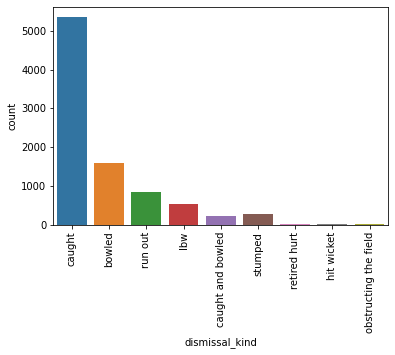

In [86]:
# kinds of dismissal
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)

**Inferences drawn by the EDA on IPL Dataset**


*   The maximun matches winning Team is Mumbai Indians, won 109 matches.
*   The maximum run by batsman is Virat Kohli with 5434 runs.
*   Player of the match is won by CH Gayle 21 times.
*   Maximum toss winning team is again Mumbai Indians, 98 times.
*   Kolkata Knight Riders won the toss, chose fielding and won the match 62 times.
*   Kolkata Knight Riders won 45 matches in Eden Gardens, kolkata.
*   Maximum match has been played in Mumbai city, i.e. 101 matches.
*   In 2013, maximum matches were played, i.e. 76 matches.







**THANK YOU**